<a href="https://colab.research.google.com/github/Karthick47v2/mock-buddy/blob/base-dev/ser_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [93]:
df = pd.read_csv('/content/gdrive/MyDrive/SER/ravdess.csv')

In [94]:
df = df.iloc[100:,:]

In [95]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
####### Try to scale
# transformer = make_column_transformer((StandardScaler(), list(df.columns)[:-1]) , remainder='passthrough')
# updated_df = pd.DataFrame(transformer.fit_transform(df), columns=transformer.get_feature_names_out())

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [97]:
model_input = keras.Input(shape=(x_train.shape[1], 1))

x = keras.layers.Conv1D(filters=256, kernel_size=8, activation='relu', kernel_initializer='he_normal', padding='same')(model_input)
# x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.6)(x)
x = keras.layers.Conv1D(filters=256, kernel_size=8, activation='relu', kernel_initializer='he_normal', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=8)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.6)(x)

x = keras.layers.Conv1D(filters=128, kernel_size=8, activation='relu', kernel_initializer='he_normal', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Conv1D(filters=128, kernel_size=8, activation='relu', kernel_initializer='he_normal', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=8)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)

x = keras.layers.Conv1D(filters=64, kernel_size=8, activation='relu', kernel_initializer='he_normal', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv1D(filters=64, kernel_size=8, activation='relu', kernel_initializer='he_normal', padding='same')(x)
# x = keras.layers.MaxPooling1D(pool_size=8)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.GlobalAveragePooling1D()(x)

x = keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = keras.Model(model_input, x)

model.summary()

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['binary_accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 260, 1)]          0         
                                                                 
 conv1d_52 (Conv1D)          (None, 260, 256)          2304      
                                                                 
 batch_normalization_52 (Bat  (None, 260, 256)         1024      
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 260, 256)          0         
                                                                 
 conv1d_53 (Conv1D)          (None, 260, 256)          524544    
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 32, 256)          0         
 g1D)                                                      

In [16]:
import matplotlib.pyplot as plt

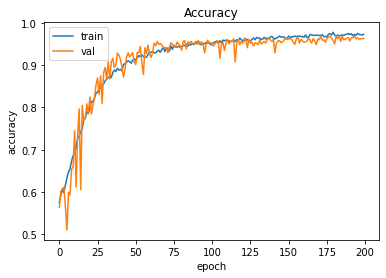

In [23]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

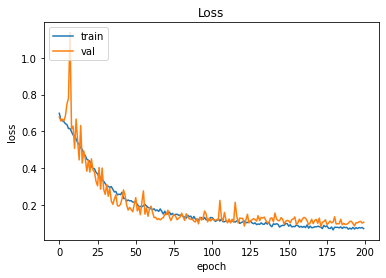

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
!mkdir ser

In [26]:
model.save('ser')

INFO:tensorflow:Assets written to: ser/assets


In [80]:
test_df = pd.read_csv('/content/gdrive/MyDrive/SER/test_savees.csv')

In [100]:
x_t = test_df.iloc[:,1:]
y_t = test_df.iloc[:,0]

In [101]:
y_pred = model.predict(x_t)

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

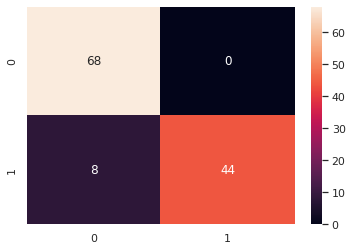

In [107]:
y_hat = []
for i in y_pred:
    y_hat.append(i>0.5)

cf = confusion_matrix(y_t, y_hat)
df = pd.DataFrame(cf, range(2), range(2))

sns.set(font_scale=1)
sns.heatmap(df, annot=True)